In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

path = "/home/ytisar/Python/RobAgain/new_rob/RobPy/src/model/ressource_photo/balise2.jpg"

def get_limits(color):
		"""Donne les nuances de la couleur en paramètre source: https://github.com/computervisioneng/color-detection-opencv/blob/master/util.py
		"""

		if "blue" == color:
			lower_limit = np.array([100,84,46])
			upper_limit = np.array([110,255,255])
		if "red" == color:
			lower_limit = np.array([0,150,100])
			upper_limit = np.array([10,255,255])
		if "green" == color:
			lower_limit = np.array([59,57,57])
			upper_limit = np.array([70,255,255])
		if "yellow" == color:
			lower_limit = np.array([20,128,93])
			upper_limit = np.array([39,255,255])
		if "white" == color:
			lower_limit = np.array([3,26,99])
			upper_limit = np.array([36,71,165])

		return lower_limit, upper_limit
	


In [10]:
import os

def search_balise_color(balise_color):
		
		#on recupère l'image
		image = cv.imread("/home/ytisar/Python/RobAgain/new_rob/RobPy/src/model/ressource_photo/balise3.jpg")

		#bgr to hsv
		hsv_image  = cv.cvtColor(image,cv.COLOR_BGR2HSV)

		
		all_mask = {}
		contours = {}
		clean_contours = []
		apparent_color = []
		
		for color in balise_color: 
			lower_limit, upper_limit = get_limits(color)
			all_mask[color] = cv.inRange(hsv_image, lower_limit, upper_limit)
		
			#plt.figure(figsize=[10,10])
			#plt.imshow(all_mask[color]);plt.title(color)

		for color,mask in all_mask.items():
			contours[color], _= cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

			image_copy = image.copy()

			# voir : https://pyimagesearch.com/2021/10/06/opencv-contour-approximation/
			for elem in contours[color]:
				ep = 0.05 * cv.arcLength(elem, True)
				approx = cv.approxPolyDP(elem, ep, True)
				
				#On essaie de retirer un maximum de bruit
				if len(approx)==4:
					clean_contours.append(approx)
					apparent_color.append(color)
					cv.drawContours(image_copy, [approx], -1, (0,255,255), 3)
			

			# Spawn a new figure
			plt.figure(figsize=[10,10])
			plt.imshow(image_copy[:,:,::-1])
			# Turn off axis numbering
			plt.axis('off')
		
		try:
			max_x = max([rect[2][0][0] for rect in clean_contours])
			max_y = max([rect[2][0][1] for rect in clean_contours])
			min_x = min([rect[0][0][0] for rect in clean_contours])
			min_y = min([rect[0][0][1] for rect in clean_contours])
		except:
			return False

		return max_x - min_x > 0 and max_y - min_y > 0 and set(apparent_color) == set(balise_color)




True

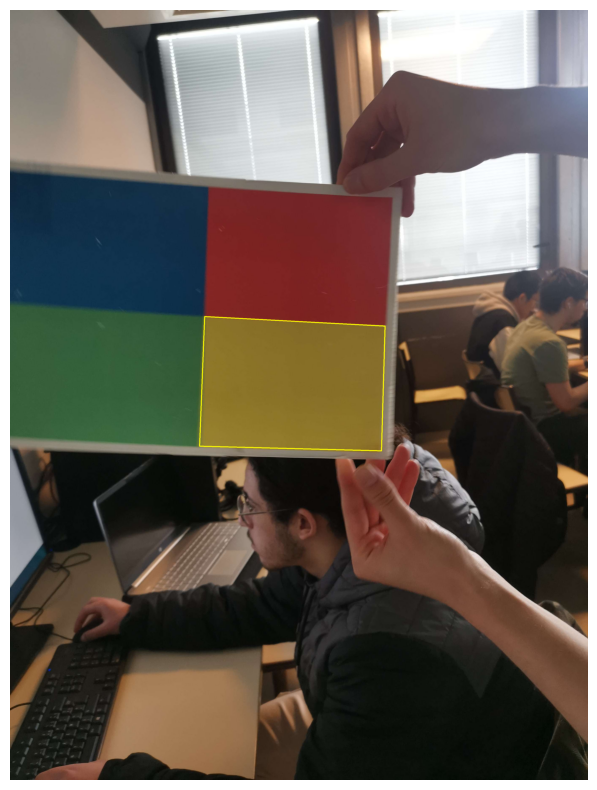

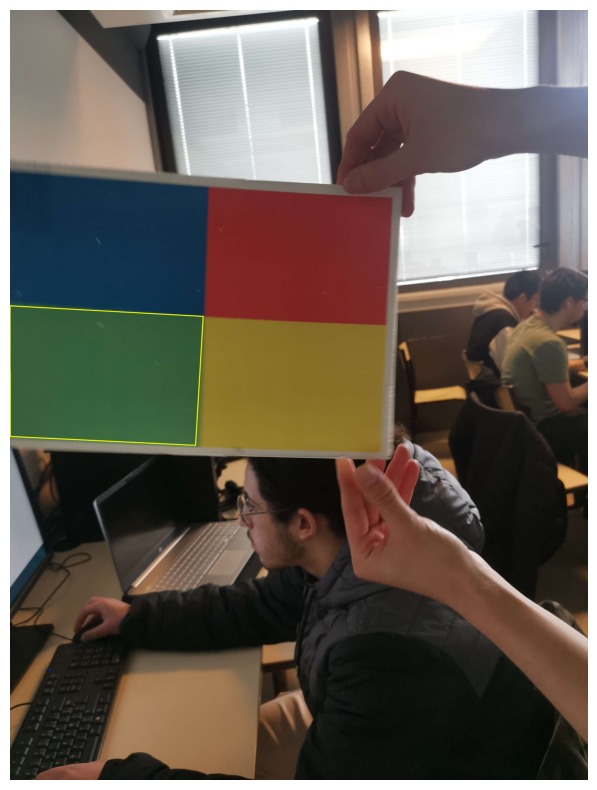

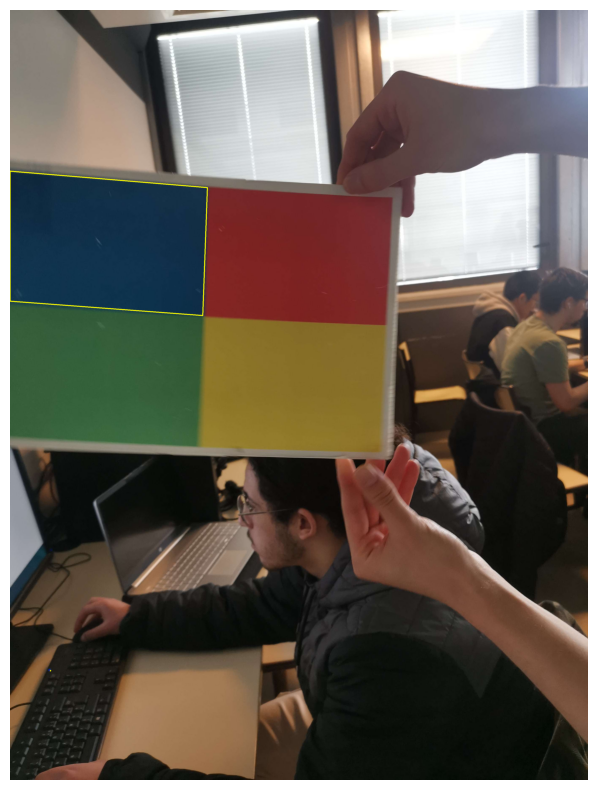

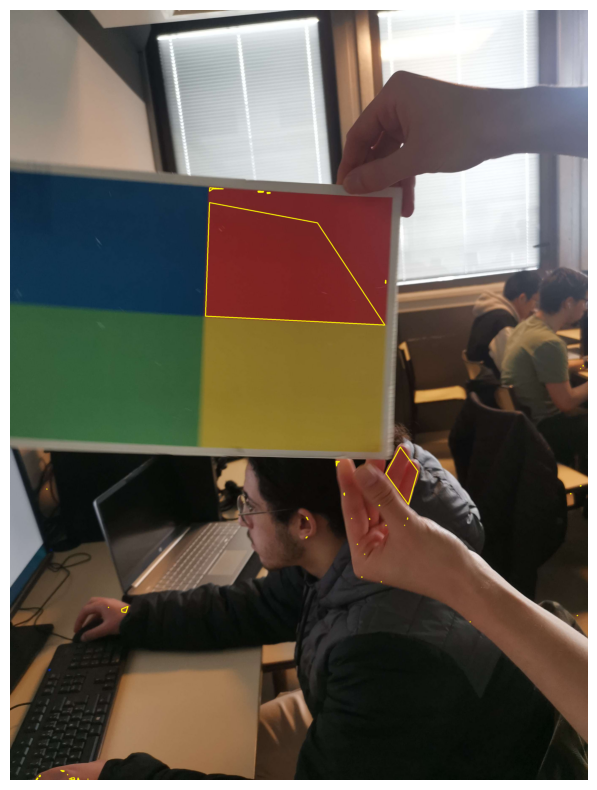

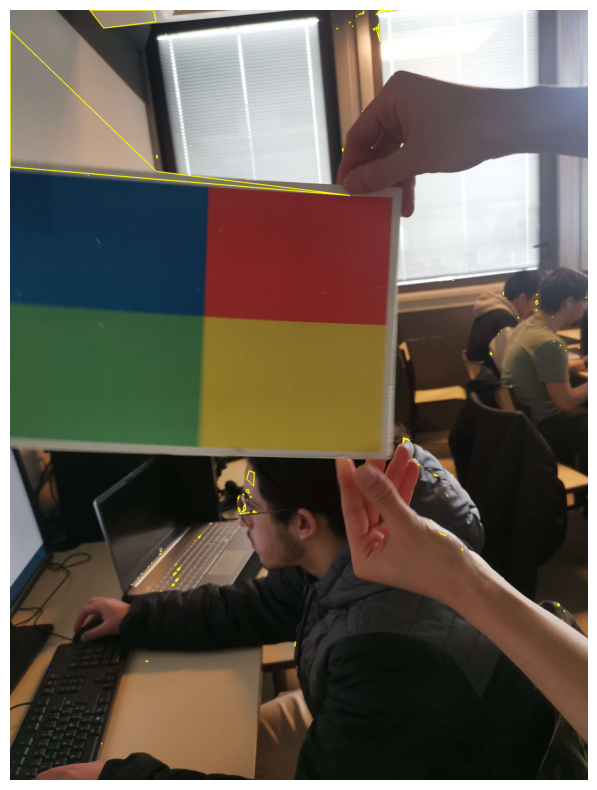

In [11]:
balise_color = ['yellow', 'green', 'blue', 'red', 'white']
search_balise_color(balise_color)

In [12]:
import cv2
import numpy as np

def nothing(x):
    pass

# Load image
image = cv2.imread("/home/ytisar/Python/RobAgain/new_rob/RobPy/src/model/ressource_photo/balise5.jpg")

# Create a window
cv2.namedWindow('image')

# Create trackbars for color change
# Hue is from 0-179 for Opencv
cv2.createTrackbar('HMin', 'image', 0, 179, nothing)
cv2.createTrackbar('SMin', 'image', 0, 255, nothing)
cv2.createTrackbar('VMin', 'image', 0, 255, nothing)
cv2.createTrackbar('HMax', 'image', 0, 179, nothing)
cv2.createTrackbar('SMax', 'image', 0, 255, nothing)
cv2.createTrackbar('VMax', 'image', 0, 255, nothing)

# Set default value for Max HSV trackbars
cv2.setTrackbarPos('HMax', 'image', 179)
cv2.setTrackbarPos('SMax', 'image', 255)
cv2.setTrackbarPos('VMax', 'image', 255)

# Initialize HSV min/max values
hMin = sMin = vMin = hMax = sMax = vMax = 0
phMin = psMin = pvMin = phMax = psMax = pvMax = 0

while(1):
    # Get current positions of all trackbars
    hMin = cv2.getTrackbarPos('HMin', 'image')
    sMin = cv2.getTrackbarPos('SMin', 'image')
    vMin = cv2.getTrackbarPos('VMin', 'image')
    hMax = cv2.getTrackbarPos('HMax', 'image')
    sMax = cv2.getTrackbarPos('SMax', 'image')
    vMax = cv2.getTrackbarPos('VMax', 'image')

    # Set minimum and maximum HSV values to display
    lower = np.array([hMin, sMin, vMin])
    upper = np.array([hMax, sMax, vMax])

    # Convert to HSV format and color threshold
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower, upper)
    result = cv2.bitwise_and(image, image, mask=mask)

    # Print if there is a change in HSV value
    if((phMin != hMin) | (psMin != sMin) | (pvMin != vMin) | (phMax != hMax) | (psMax != sMax) | (pvMax != vMax) ):
        print("(hMin = %d , sMin = %d, vMin = %d), (hMax = %d , sMax = %d, vMax = %d)" % (hMin , sMin , vMin, hMax, sMax , vMax))
        phMin = hMin
        psMin = sMin
        pvMin = vMin
        phMax = hMax
        psMax = sMax
        pvMax = vMax

    # Display result image
    cv2.imshow('image', result)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 1 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 4 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 8 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 10 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 11 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 12 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 13 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 15 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 17 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 18 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 19 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 20 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 21 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 2

In [206]:
import random
import re
balise = []
imposter = []
for fichier in os.listdir("./src/model/ressource_photo") :
	if re.search("^b", fichier):
		balise.append(fichier)
	else:
		imposter.append(fichier)
print(random.sample(imposter,random.randint(0,4)) + random.sample(balise,1))


['autre4.jpg', 'balise3.jpg']


In [210]:
path = "./src/model/ressource_photo/"
print(path + random.sample(os.listdir(path), 1)[0])

./src/model/ressource_photo/balise5.jpg
